# Price recommmendation - Polynomial Regression
## Chapter 6
### Predictive Analytics for the Modern Enterprise 

This is jupyter notebook that can be used to follow along the code examples for Chapter 6 Section 1 - Unsupervised learning of the book. The code examples go through some of the functionality that can be used to work with the sci-kit learn library in Python to work with unsupervised learning models. 

The notebook has been tested using the following pre-requisite:

Python V3.9.13 - https://www.python.org/
Anaconda Navigator V3 for Python 3.9 - https://www.anaconda.com/
Jupyter - V6.4.12 - https://jupyter.org/
Desktop computer - macOS Ventura V13.1

Documentation referece for Scikit Learn: https://scikit-learn.org/stable/

### Pre-requisites


You will need to install the scikit-learn package in your envionrment. 
In your environment run the following command

```bash
conda install -c conda-forge scikit-learn
```
OR
```bash
pip install -U scikit-learn
```

### Training and predicting with a Linear Regression Model

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import model_selection, metrics #To perform model cross validation and scoring
from sklearn.linear_model     import LinearRegression # The linear regression class in scikit learn supports polynomial regression
from sklearn.model_selection  import train_test_split # To create testing and training splits of data
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #modeling scoring metrics
from sklearn.preprocessing import PolynomialFeatures #Preprocessing class to generate polynomail features

In [3]:
%matplotlib inline

Provide data from the Palmer Archipelago (Antarctica) penguin dataset.

License: CC0

* Sourced from https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv

* Raw data used: https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv

This module contains one pandas Dataframe: data.

In [4]:
url = "../datasets/prod.csv" 
sales = pd.read_csv(url) #Read the data from the URL in a Pandas dataframe
predictors = ['price']
predicted = ['sales_quantity']

sales = sales.copy()
sales = sales[sales['item_code'] == 52]
sales

,day,price,sales_quantity,item_code
0,0,1.00,13217.0,52
1,1,1.00,13132.0,52
2,2,1.01,12706.0,52
3,3,1.01,12671.0,52
4,4,1.02,12748.0,52
...,...,...,...,...
295,295,2.96,8429.0,52
296,296,2.97,8375.0,52
297,297,2.98,8269.0,52
298,298,2.99,8097.0,52


In [5]:
#Polynomial Range
degree_min = 1
degree_max = 3

# Train models with increasing polynomail degree and compare scoring metrics
for poly_d in range(degree_min,degree_max+1):
    poly_gen = PolynomialFeatures(degree=poly_d, include_bias=False) #Polynomail generator
    poly_features = poly_gen.fit_transform(sales[predictors]) #Generate polynomail features
    X_train, X_test, y_train, y_test = train_test_split(poly_features, sales[predicted], train_size=0.75, random_state=110) #create Test/Train split
    
    poly_reg_model = LinearRegression() #Define the model
    poly_reg_model.fit(X_train, y_train) #Fit the model
    poly_reg_y_predicted = poly_reg_model.predict(X_test) #predict based on test data
    
    r2 = r2_score(y_test, poly_reg_y_predicted) #R-squared score
    rmse = mean_squared_error(y_test, poly_reg_y_predicted, squared=False) #Root Mean Squared Error
    mae = mean_absolute_error(y_test, poly_reg_y_predicted) #Mean Absolute Error
    
    print("Degree: ", poly_d)
    print("R-Squared: ",r2 )
    print("RMSE: ",rmse) 
    print("MAE: ",mae, "\n") 

Degree:  1
R-Squared:  0.7559499163970946
RMSE:  699.5835213671534
MAE:  496.9973124296419 

Degree:  2
R-Squared:  0.8854371932495116
RMSE:  479.3159856299965
MAE:  293.40036676505747 

Degree:  3
R-Squared:  0.8880765913904459
RMSE:  473.7623614777194
MAE:  289.5699290080416 



Text(0, 0.5, "['sales_quantity']")

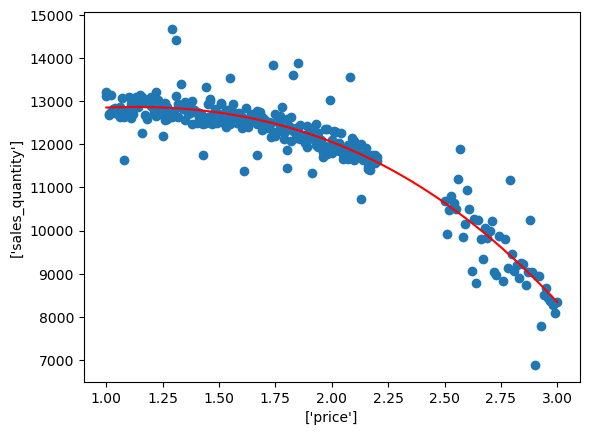

In [6]:
feature_range = np.linspace(1, 3) #Generate x features in range
poly_features = poly_gen.fit_transform(feature_range.reshape(-1,1)) #Generate polynomail features

y_predicted = poly_reg_model.predict(poly_features) #Make predictions on polynomial features
plt.scatter(sales[predictors], sales[predicted]) #Plot actual data
plt.plot(feature_range,y_predicted, c="red") #Plot predictions

plt.xlabel(predictors) 
plt.ylabel(predicted)

In [8]:
y_predicted = y_predicted.flatten() #Flatten the predicted values to a 1d array
total = feature_range*y_predicted #Multiply feature_range values with predicted sales_quantity (Total Sales = price * sales_quantity)
total

array([12854.40798534, 13386.91078617, 13917.07135795, 14444.45330157,
       14968.60542649, 15489.06175077, 16005.34150105, 16516.94911255,
       17023.37422911, 17524.09170312, 18018.56159558, 18506.22917607,
       18986.52492277, 19458.86452244, 19922.64887042, 20377.26407065,
       20822.08143566, 21256.45748656, 21679.73395305, 22091.23777343,
       22490.28109457, 22876.16127194, 23248.16086959, 23605.54766017,
       23947.57462492, 24273.47995364, 24582.48704475, 24873.80450525,
       25146.62615072, 25400.13100533, 25633.48330186, 25845.83248164,
       26036.31319461, 26204.04529931, 26348.13386285, 26467.66916093,
       26561.72667785, 26629.36710648, 26669.63634829, 26681.56551334,
       26664.17092028, 26616.45409634, 26537.40177734, 26425.98590769,
       26281.16364039, 26101.87733703, 25887.05456778, 25635.60811141,
       25346.43595526, 25018.42129529])

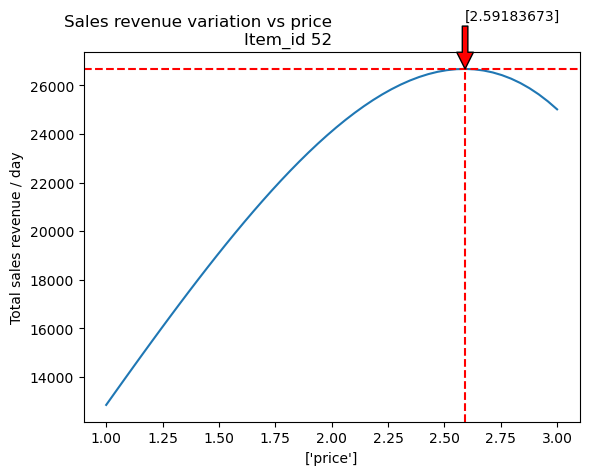

In [26]:
ymax = max(total) #Maximum value for total sales rales revenue
xpos = np.where(total == ymax) #Position of x(price) for Maximum value of total
xmax = feature_range[xpos] #Value of x(price) where total is maximized

fig = plt.figure()
ax = fig.add_subplot()
line = ax.plot(feature_range, total)#Plot total sales revenue vs item price

ax.annotate(xmax, xy=(xmax, ymax), xytext=(xmax, ymax + 2000), arrowprops=dict(facecolor='red'),) #Label the maximum point with the price value

ax.axvline(xmax, color='red', linestyle='dashed') #Vertical line for price
ax.axhline(ymax, color='red', linestyle='dashed') #Horizontal line for total sales revenue

plt.title("Sales revenue variation vs price\nItem_id 52", fontdict={'horizontalalignment': 'right'})
plt.xlabel(predictors) 
plt.ylabel('Total sales revenue / day')

plt.show()

In [27]:
print("Optimal selling price: ", xmax[0])
print("Maximum Daily sale: ", ymax)

Optimal selling price:  2.591836734693877
Maximum Daily sale:  26681.56551334295
